importing libraries

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import calendar

%matplotlib inline

importing data

In [88]:
df = pd.read_csv("/content/first inten project.csv")
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


check data types

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

check for dupliactes and null values

In [90]:
print (df.isnull().sum())
print (df.Booking_ID.duplicated().sum())

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64
0


checking on the date of reservation

In [91]:
# Convert 'date of reservation' to datetime, setting invalid dates to NaT
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')

# Count and print the number of NaT values
df['date of reservation'].isna().sum()

37

In [92]:
# Remove NaT values
df = df.dropna(subset=['date of reservation'])

# Extract year, month, and day after removing NaT values
df['year'] = df['date of reservation'].dt.year
df['month'] = df['date of reservation'].dt.month
df['day'] = df['date of reservation'].dt.day


<ipython-input-92-bf0eb54860d5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date of reservation'].dt.year
<ipython-input-92-bf0eb54860d5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date of reservation'].dt.month
<ipython-input-92-bf0eb54860d5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

data encoding

In [93]:
# label encoding on booking status
df['booking status'] = df['booking status'].str.strip().str.lower()
status_mapping = {'not_canceled': 1, 'canceled': 0}
df['booking status'] = df['booking status'].map(status_mapping)
df['booking status'].fillna(0, inplace=True)

# one hot encoding for 'meal types'
meal_dummies = pd.get_dummies(df['type of meal'], drop_first=False)

# one hot encoding for 'room type'
room_dummies = pd.get_dummies(df['room type'], drop_first=False)

# one hot encoding for 'market segment type'
market_segment_dummies = pd.get_dummies(df['market segment type'], drop_first=False)

# Concatenate the new one-hot encoded columns with the original dataframe
df = pd.concat([df, meal_dummies, room_dummies, market_segment_dummies], axis=1)

# Drop original categorical columns
df.drop(columns=['type of meal', 'room type', 'market segment type'], inplace=True)


df.dtypes

<ipython-input-93-a0976651eb00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['booking status'] = df['booking status'].str.strip().str.lower()
<ipython-input-93-a0976651eb00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['booking status'] = df['booking status'].map(status_mapping)
<ipython-input-93-a0976651eb00>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace 

,0
Booking_ID,object
number of adults,int64
number of children,int64
number of weekend nights,int64
number of week nights,int64
car parking space,int64
lead time,int64
repeated,int64
P-C,int64
P-not-C,int64


data selection

In [94]:
df['total family members'] = df['number of adults'] + df['number of children']    #total family members
df['total number of days'] = df['number of weekend nights'] + df['number of week nights']   #total days reserved
df.drop('Booking_ID', axis=1, inplace=True)   #booking_ID is unique so not needed by ML
df.drop('date of reservation', axis=1, inplace=True) #no need for it

In [95]:
df.dtypes

,0
number of adults,int64
number of children,int64
number of weekend nights,int64
number of week nights,int64
car parking space,int64
lead time,int64
repeated,int64
P-C,int64
P-not-C,int64
average price,float64


check for values and outliers

In [96]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,booking status,year,month,day,total family members,total number of days
count,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.00000,36248.000000
mean,1.845178,0.105302,0.810445,2.204508,0.030926,85.282360,0.025546,0.023339,0.152919,103.435350,0.620034,0.672203,2017.820100,7.429348,15.583011,1.95048,3.014953
std,0.518671,0.402597,0.870938,1.410825,0.173119,85.961536,0.157779,0.368432,1.753126,35.081308,0.786429,0.469417,0.384396,3.066604,8.734280,0.65008,1.786041
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,1.00000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000,2018.000000,5.000000,8.000000,2.00000,2.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000,1.000000,2018.000000,8.000000,16.000000,2.00000,3.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000,2018.000000,10.000000,23.000000,2.00000,4.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000,2018.000000,12.000000,31.000000,12.00000,24.000000


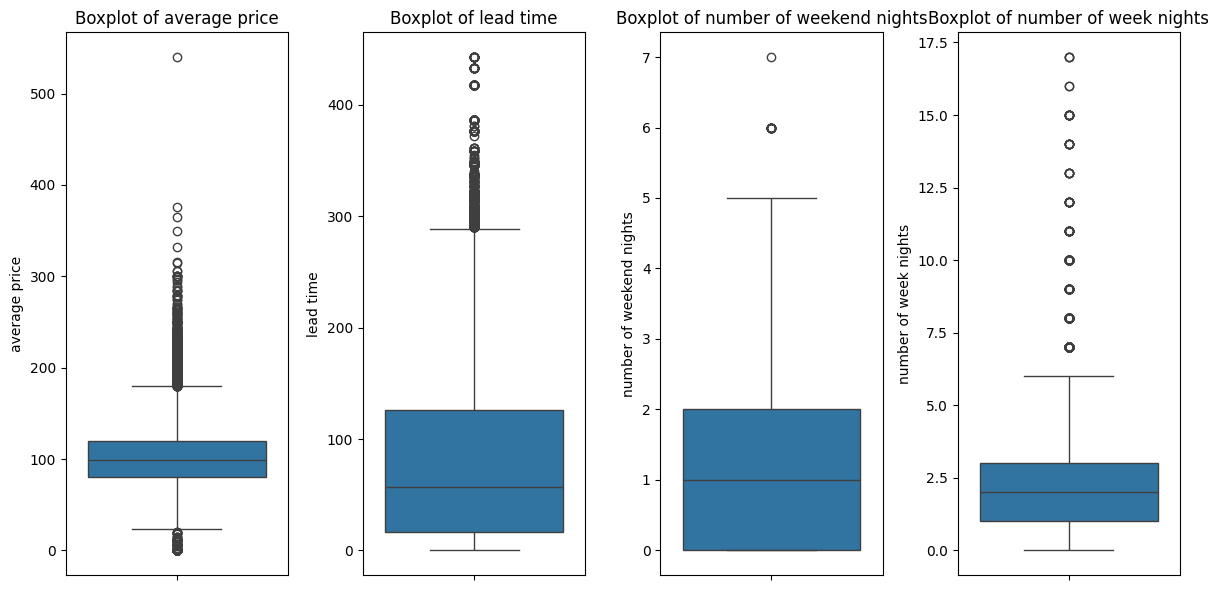

In [97]:
df.columns = df.columns.str.strip()
columns_to_plot = ['average price', 'lead time', 'number of weekend nights', 'number of week nights']

# Create boxplots for each selected column
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(1, len(columns_to_plot), i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

handling outliers using z-score method and replacing them with the mean value

In [98]:
z_scores_1 = np.abs(stats.zscore(df['lead time']))
z_scores_2 = np.abs(stats.zscore(df['average price']))

# Define threshold (typically 3)
threshold = 3

# Compute mean (excluding outliers to prevent distortion)
mean_value_1 = df['lead time'][z_scores_1 <= threshold].mean()

# Replace outliers with mean
df['lead time'] = np.where(z_scores_1 > threshold, mean_value_1, df['lead time'])

# Compute mean (excluding outliers to prevent distortion)
mean_value_2 = df['average price'][z_scores_2 <= threshold].mean()

# Replace outliers with mean
df['average price'] = np.where(z_scores_2 > threshold, mean_value_2, df['average price'])


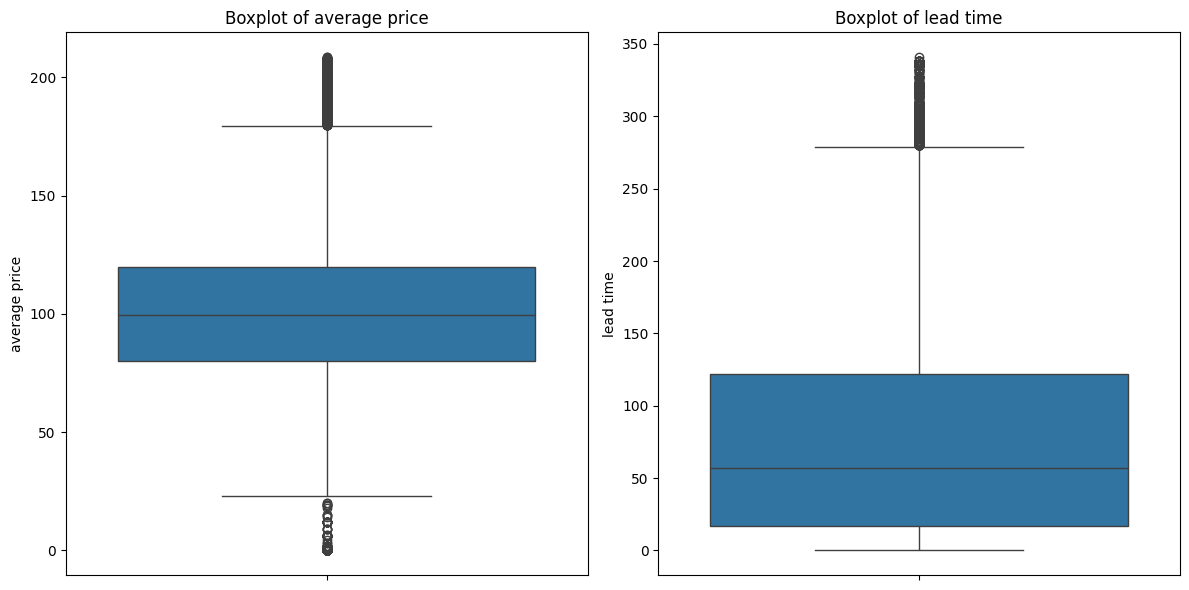

In [99]:
columns_to_plot = ['average price', 'lead time']

# Create boxplots for each selected column
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(1, len(columns_to_plot), i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

feature selection

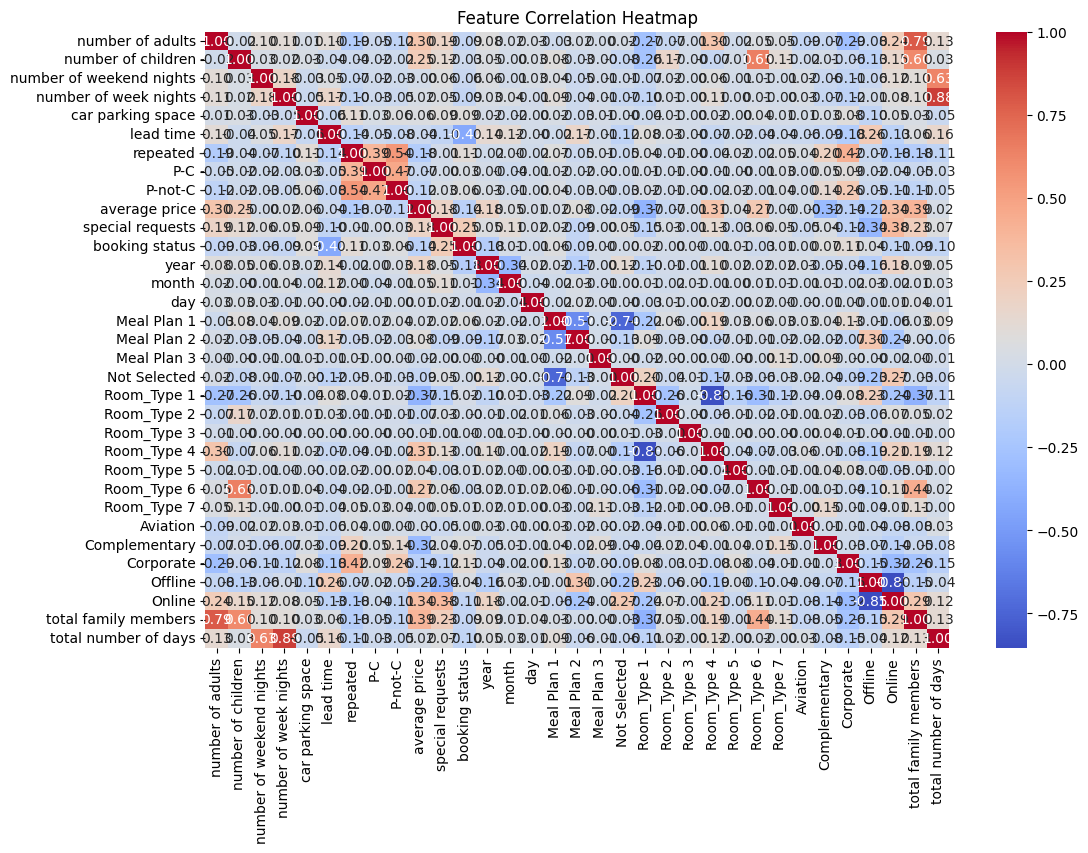

In [100]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [101]:
high_corr_pairs = []
threshold = 0.8
for col in corr_matrix.columns:
    for row in corr_matrix.index:
        if col != row and abs(corr_matrix.loc[row, col]) > threshold:
            high_corr_pairs.append((row, col, corr_matrix.loc[row, col]))

# Print highly correlated features
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: Correlation = {pair[2]:.2f}")

total number of days and number of week nights: Correlation = 0.88
Room_Type 4 and Room_Type 1: Correlation = -0.83
Room_Type 1 and Room_Type 4: Correlation = -0.83
Online and Offline: Correlation = -0.85
Offline and Online: Correlation = -0.85
number of week nights and total number of days: Correlation = 0.88


In [102]:
df.drop(columns=['number of week nights', 'Room_Type 4', 'Offline'], inplace=True) #dropping features found through high correlation

VIF for multicolinearity

In [103]:
# Select numerical features only
X = df.select_dtypes(include=['number'])

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display results
print(vif_data)


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                     Feature        VIF
0           number of adults        inf
1         number of children        inf
2   number of weekend nights   3.116162
3          car parking space   1.065238
4                  lead time   2.693241
5                   repeated   1.598049
6                        P-C   1.338777
7                    P-not-C   1.603726
8              average price  14.030438
9           special requests   1.944384
10            booking status   4.184150
11                      year  37.746207
12                     month   7.161081
13                       day   4.202254
14      total family members        inf
15      total number of days   6.633690


In [104]:
df.drop(columns=['number of adults', 'number of children', 'year', 'number of weekend nights'], inplace=True)

In [105]:
#checking again after dropping

# Select numerical features only
X = df.select_dtypes(include=['number'])

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display results
print(vif_data)

                 Feature        VIF
0      car parking space   1.064733
1              lead time   2.441525
2               repeated   1.552141
3                    P-C   1.337900
4                P-not-C   1.601930
5          average price  10.863566
6       special requests   1.868426
7         booking status   3.255469
8                  month   6.254801
9                    day   3.793204
10  total family members  11.285835
11  total number of days   3.805259


In [106]:
corr_matrix = df.corr()
high_corr_pairs = []
threshold = 0.8
for col in corr_matrix.columns:
    for row in corr_matrix.index:
        if col != row and abs(corr_matrix.loc[row, col]) > threshold:
            high_corr_pairs.append((row, col, corr_matrix.loc[row, col]))

# Print highly correlated features
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: Correlation = {pair[2]:.2f}")

In [107]:
# Define categorical features (excluding the target variable)
categorical_features = ['Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3', 'Not Selected',
                        'Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 5', 'Room_Type 6', 'Room_Type 7',
                        'Aviation', 'Complementary', 'Corporate', 'Online']

# Perform chi-square test
X_categorical = df[categorical_features]
y = df['booking status']

chi_scores, p_values = chi2(X_categorical, y)
chi_results = dict(zip(categorical_features, p_values)) #creating dictionary
# Print p-values for each categorical feature
for feature, p_val in chi_results.items():
    print(f"{feature}: p-value = {p_val:.5f}")


Meal Plan 1: p-value = 0.00000
Meal Plan 2: p-value = 0.00000
Meal Plan 3: p-value = 0.54268
Not Selected: p-value = 0.61165
Room_Type 1: p-value = 0.06475
Room_Type 2: p-value = 0.92489
Room_Type 3: p-value = 0.81251
Room_Type 5: p-value = 0.06194
Room_Type 6: p-value = 0.00000
Room_Type 7: p-value = 0.00744
Aviation: p-value = 0.44884
Complementary: p-value = 0.00000
Corporate: p-value = 0.00000
Online: p-value = 0.00000


In [108]:
features_to_drop = ["Aviation", "Room_Type 3", "Not Selected", "Meal Plan 3"] #dropping features of high p_values
df.drop(columns=features_to_drop, inplace=True)


feature scaling

In [109]:
# Identify numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('booking status', errors='ignore')

# Apply Standard Scaling
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df['booking status'].head()

,booking status
0,1
1,1
2,0
3,0
4,0


In [111]:
# Save the preprocessed DataFrame to a CSV file
df.to_csv('processed_data.csv', index=False)

# Download the file (for Google Colab)
from google.colab import files
files.download('processed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>